<a href="https://colab.research.google.com/github/alek00sandra/uczenie_maszynowe/blob/main/Augumentacja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Augumentacja danych** : techinka pozwalająca na zwiększenie zbioru treningowego przez odpowiednie przekształcenie danych wejściowych. Technika bardzo przydatna zwłaszcza gdzy nie mamy wystarczającej ilości danych do wytrenowania. W uczeniou głebokim im więcej posiadamydanych treningowych tym teoretycznie lepiej jesteśmy w stanie wytrenowaać sieć. Wykorzystamy technkikę do trenowania [roblemów związanych z przetwarzaniem obrazów.

In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.8/dist-packages/tensorflow-2.11.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/tensorflow/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/main.py", line 70, in main
    return command.main(cmd_args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/base_command.py", line 101, in main
    return self._main(args)
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/cli/base_command.py", l

In [ ]:
import tensorflow as tf
print(tf._version_)

AttributeError: ignored

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, TimeDistributed, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

!conda install keras_preprocessing
!pip install Keras-Preprocessing
!pip install tensorflow==2.9.0

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 34.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0.7
    Uninstalling flatbuffers-2.0.7:
      Successfully uninstalled flatbuffers-2.0.7
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tens

In [ ]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt

from numpy import expand_dims



from keras_preprocessing.image import load_img
from keras_preprocessing.image  import img_to_array
from keras_preprocessing.image import ImageDataGenerator



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


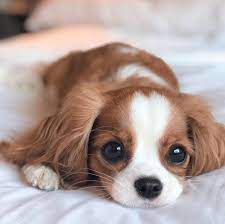

In [ ]:
img = load_img('dog.jfif')
img

In [ ]:
data = img_to_array(img)
#konwertujemy do tablicy
# wyświetlamy rozmiar
data.shape

(224, 225, 3)

In [ ]:
data[:,:,0]

array([[136., 138., 140., ..., 207., 206., 209.],
       [137., 139., 142., ..., 207., 207., 210.],
       [138., 141., 143., ..., 208., 208., 211.],
       ...,
       [222., 225., 228., ..., 206., 204., 206.],
       [223., 225., 228., ..., 205., 204., 210.],
       [223., 225., 227., ..., 205., 203., 212.]], dtype=float32)

In [ ]:
data[:,:,1]

array([[129., 131., 133., ..., 203., 202., 205.],
       [130., 132., 133., ..., 203., 203., 206.],
       [131., 132., 134., ..., 204., 204., 207.],
       ...,
       [230., 233., 236., ..., 212., 210., 211.],
       [231., 233., 236., ..., 211., 210., 215.],
       [231., 233., 235., ..., 211., 209., 217.]], dtype=float32)

In [ ]:
samples = expand_dims(data,0)
samples
samples.shape

# rozszerzamy rozmiar,dodalismy jeden wymiar
# 1 - ilosc probek
# kolejne liczbyn to atrybuty naszego zdjecia


(1, 224, 225, 3)

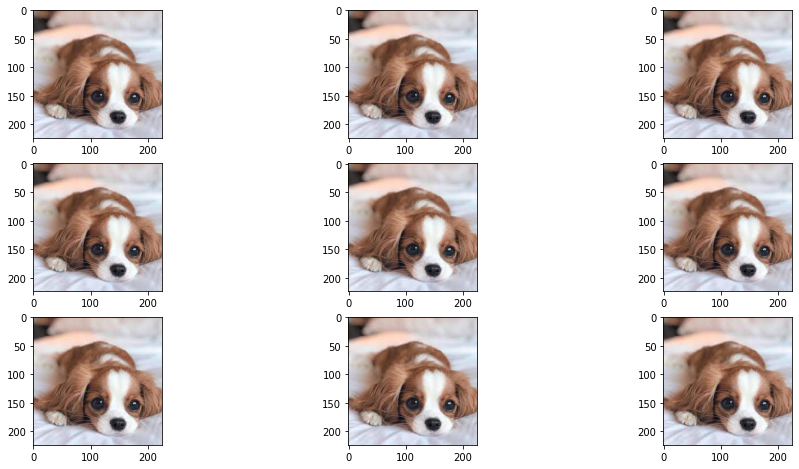

In [ ]:
datagen = ImageDataGenerator() #tworzymy instancję klasy ImageDataGenerator

iterator = datagen.flow(samples, batch_size = 1)

plt.figure(figsize = (16,8))
for i in range(9):
  plt.subplot(330 + i +1)
  batch = iterator.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()

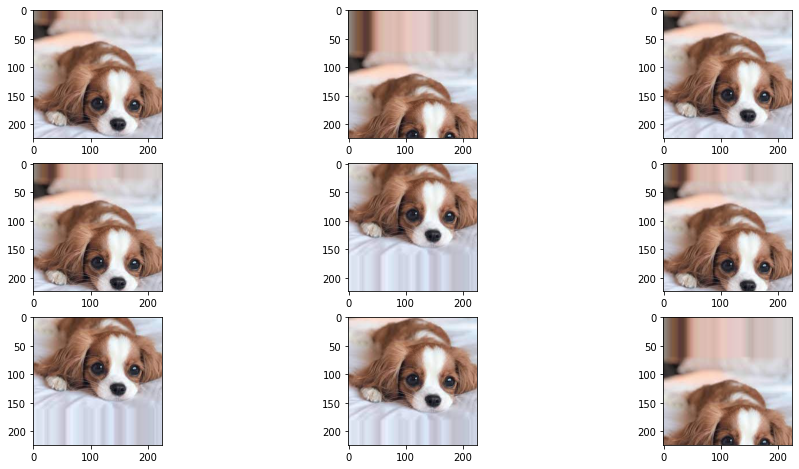

In [ ]:
datagen = ImageDataGenerator(height_shift_range = 0.5)

iterator = datagen.flow(samples,batch_size = 1)


plt.figure(figsize = (16,8))
for i in range(9):
  plt.subplot(330 + i + 1)
  batch = iterator.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()


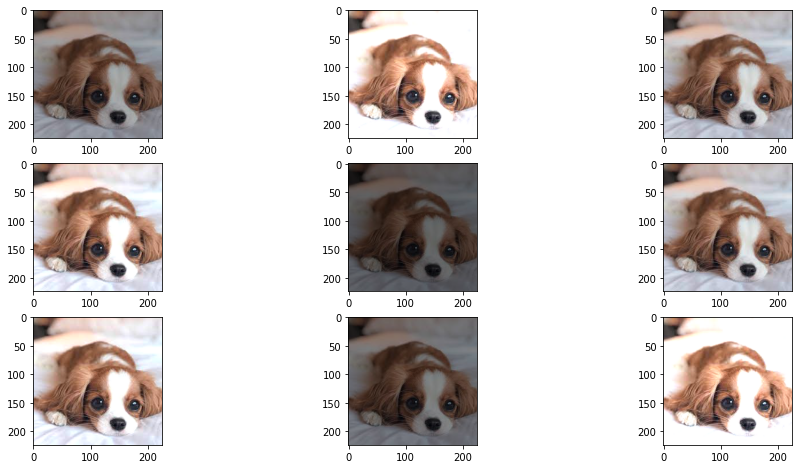

In [ ]:
datagen = ImageDataGenerator(brightness_range = [0.4,1.5])

iterator = datagen.flow(samples,batch_size = 1)


plt.figure(figsize = (16,8))
for i in range(9):
  plt.subplot(330 + i + 1)
  batch = iterator.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()


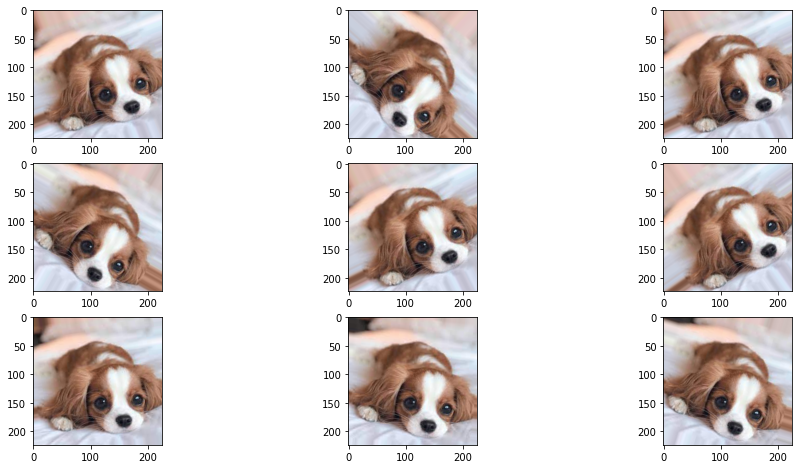

In [ ]:
datagen = ImageDataGenerator(rotation_range = 45)

iterator = datagen.flow(samples,batch_size = 1)


plt.figure(figsize = (16,8))
for i in range(9):
  plt.subplot(330 + i + 1)
  batch = iterator.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()

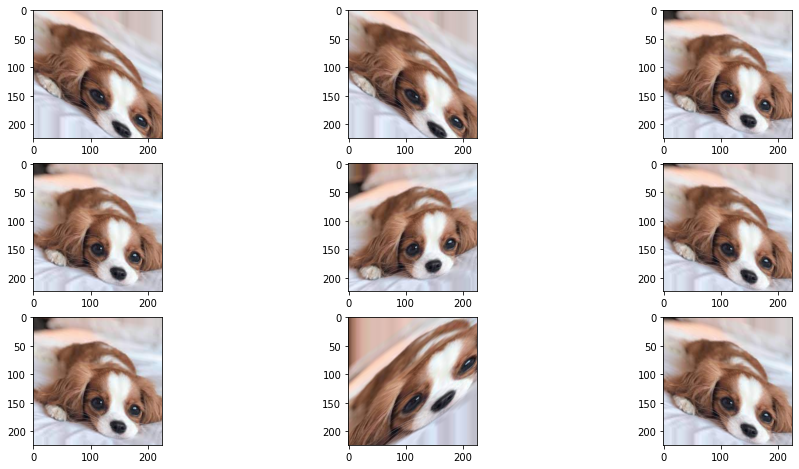

In [ ]:
datagen = ImageDataGenerator(shear_range =50)

iterator = datagen.flow(samples,batch_size = 1)


plt.figure(figsize = (16,8))
for i in range(9):
  plt.subplot(330 + i + 1)
  batch = iterator.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()

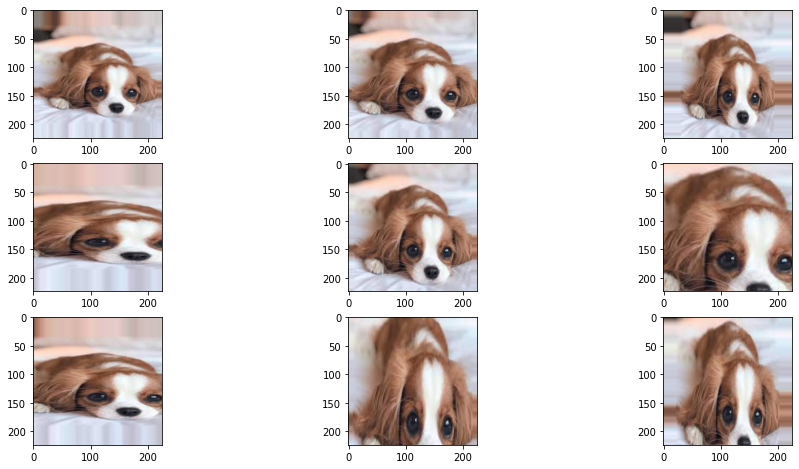

In [ ]:
datagen = ImageDataGenerator(zoom_range = 0.50)

iterator = datagen.flow(samples,batch_size = 1)


plt.figure(figsize = (16,8))
for i in range(9):
  plt.subplot(330 + i + 1)
  batch = iterator.next()
  image = batch[0].astype('uint8')
  plt.imshow(image)
plt.show()